In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import *


In [22]:
def rand_repeater_chain(distance,Nrepeater,min_dist = 5):
    repeater_loc = np.concatenate(([0],np.sort(np.random.rand(Nrepeater)),[1]))*distance
    while np.min(np.diff(repeater_loc))< min_dist:
        repeater_loc = np.concatenate(([0],np.sort(np.random.rand(Nrepeater)),[1]))*distance    
    return repeater_loc

def delay_calculator(repeater_loc, elementary_link_sync= False):
    ## ouputs: 
    ## node_time :  coherence time for repeater memories
    ## and total_time : coherence time for end-users's memories
    ## input:
    ## location of repeaters as [0,|r1-r_A|,|r2-r1|,|r3-r2|,...,|r_B-r_n|]
    Nrepeater = len(repeater_loc)-2 # number of repeater nodes
    events = np.zeros((len(repeater_loc),3)) # 3 events at each node
    if elementary_link_sync:
        events[1:,0] = repeater_loc[1:]-repeater_loc[:-1]
        events[1,2] = events[2,0] + (repeater_loc[2]-repeater_loc[1])
        for i in range(2,Nrepeater+1):
            events[i,1]= np.max([events[i,0],events[i+1,0]+repeater_loc[i+1]-repeater_loc[i]])
            events[i,2]= events[i-1,2] + repeater_loc[i]-repeater_loc[i-1]
            events[i,2]= np.max(events[i,1:])
    else:
        events[:,0] = repeater_loc # receiving quantum signal
        events[1,2] = events[1,0] + 2* (repeater_loc[2]-repeater_loc[1])
        for i in range(2,Nrepeater+1):
            # for node i
            # receiving classical acknowledgement from next node and possible swap result from previous node
            events[i,1]= repeater_loc[i]+ 2*np.max([repeater_loc[i]-repeater_loc[i-1],repeater_loc[i+1]-repeater_loc[i]])
            events[i,2]= events[i-1,2] + repeater_loc[i]-repeater_loc[i-1] # receiving swap result
            events[i,2]= np.max(events[i,1:]) # whichever event takes longer determines the swapping schedule at node i
    #     return events
    total_time = events[Nrepeater,2] + repeater_loc[Nrepeater]
    node_time = np.max(events[1:-1,2]-events[1:-1,0])
    return node_time, total_time


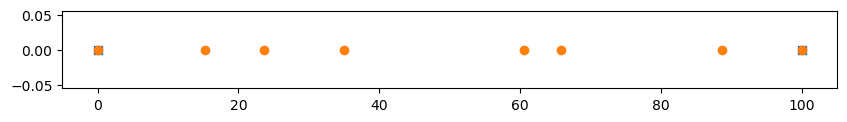

In [20]:

distance = 100 # in km
Nrepeater = 6

locs = rand_repeater_chain(distance,Nrepeater)
# locs = np.linspace(0,1,Nrepeater+2)*distance  # uniform
plt.figure(figsize=(10,1))
plt.plot([0,distance],[0,0],"s")
plt.plot(locs,0*locs,"o")
plt.show()

# successive elementary link generation

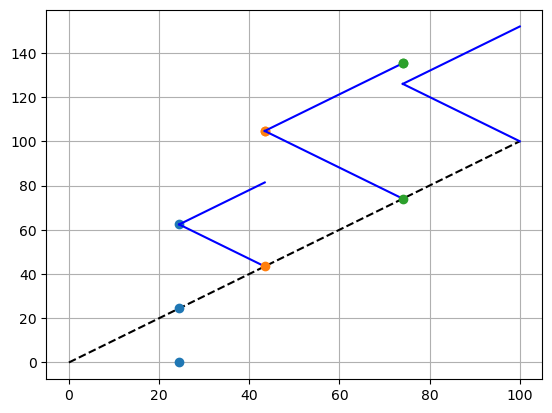

(61.23415058106178, 209.33119567833205)


In [7]:

#repeater_loc = rand_repeater_chain(distance,Nrepeater)
repeater_loc = locs 
events = np.zeros((Nrepeater+2,3))
events[:,0] = repeater_loc
# events[0,2] = events[0,0] + 2* (repeater_loc[1]-repeater_loc[0])
events[1,2] = events[1,0] + 2* (repeater_loc[2]-repeater_loc[1])
for i in range(2,Nrepeater+1):
    events[i,1]= repeater_loc[i]+ 2*np.max([repeater_loc[i]-repeater_loc[i-1],repeater_loc[i+1]-repeater_loc[i]])
    events[i,2]= events[i-1,2] + repeater_loc[i]-repeater_loc[i-1]
    events[i,2]= np.max(events[i,1:])

plt.figure()
x = np.linspace(0,distance)
plt.plot(x,x,"k--")
for i in range(1,Nrepeater+1):
    plt.plot([repeater_loc[i]]*3,events[i,:],"o")
    plt.plot([repeater_loc[i+1],repeater_loc[i]],[repeater_loc[i+1],2*repeater_loc[i+1]-repeater_loc[i]],"b")
    plt.plot([repeater_loc[i],repeater_loc[i+1]],[2*repeater_loc[i+1]-repeater_loc[i],3*repeater_loc[i+1]-2*repeater_loc[i]],"b")
plt.grid()
plt.show()

print(delay_calculator(repeater_loc))

# simultaneous elementary link generation

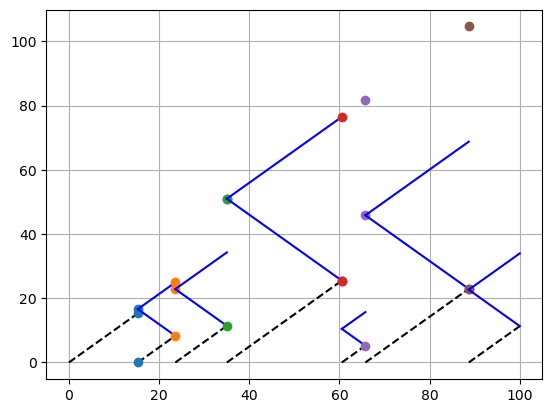

(50.99401348086607, 228.34195221772066)


In [21]:
#repeater_loc = rand_repeater_chain(distance,Nrepeater)
repeater_loc = locs 
events = np.zeros((Nrepeater+2,3))
events[1:,0] = repeater_loc[1:]-repeater_loc[:-1]
# events[0,2] = events[0,0] + 2* (repeater_loc[1]-repeater_loc[0])
events[1,2] = events[2,0] + (repeater_loc[2]-repeater_loc[1])
for i in range(2,Nrepeater+1):
    events[i,1]= np.max([events[i,0],events[i+1,0]+repeater_loc[i+1]-repeater_loc[i]])
    events[i,2]= events[i-1,2] + repeater_loc[i]-repeater_loc[i-1]
    events[i,2]= np.max(events[i,1:])

plt.figure()
i = 0
plt.plot([repeater_loc[i],repeater_loc[i+1]],[0,repeater_loc[i+1]-repeater_loc[i]],"k--")
for i in range(1,Nrepeater+1):
    plt.plot([repeater_loc[i],repeater_loc[i+1]],[0,repeater_loc[i+1]-repeater_loc[i]],"k--")
    plt.plot([repeater_loc[i]]*3,events[i,:],"o")
    dt = repeater_loc[i+1]-repeater_loc[i]
    plt.plot([repeater_loc[i+1],repeater_loc[i]],[events[i+1,0],events[i+1,0]+dt],"b")
    plt.plot([repeater_loc[i],repeater_loc[i+1]],[events[i+1,0]+dt,events[i+1,0]+2*dt],"b")
plt.grid()
plt.show()

print(delay_calculator(repeater_loc))

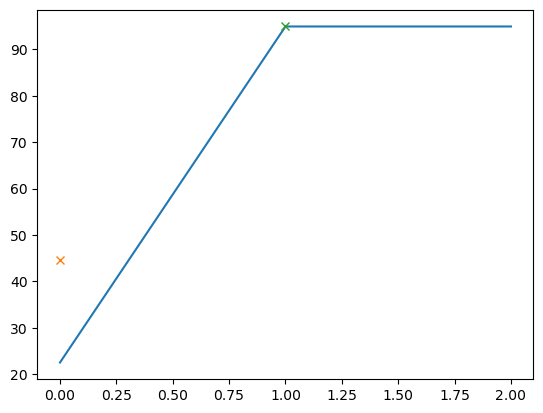

In [13]:
plt.plot(events[1:-1,2]-events[1:-1,0])
for i in range(1,Nrepeater):
    plt.plot(i-1,2*np.max([repeater_loc[i]-repeater_loc[i-1],repeater_loc[i+1]-repeater_loc[i]]),"x")
plt.show()

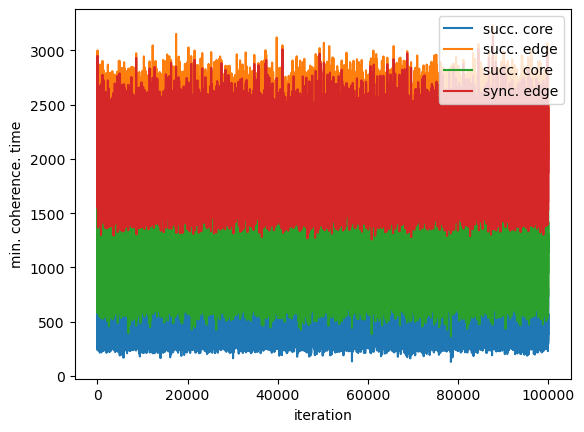

In [69]:

distance = 1000 # in km
Nrepeater = 10
min_dist = 20
Niter =100000
total_time = np.zeros(Niter)
node_time = np.zeros(Niter)
total_time_sync = np.zeros(Niter)
node_time_sync = np.zeros(Niter)
for iter in range(Niter):
    locations = rand_repeater_chain(distance,Nrepeater,min_dist)
#     events = delay_calculator(locations)
#     total_time[iter] = events[Nrepeater,2] + locations[Nrepeater]
#     node_time[iter] = np.max(events[1:-1,2]-events[1:-1,0])
    node_time_sync[iter], total_time_sync[iter] = delay_calculator(locations,True)
    node_time[iter], total_time[iter] = delay_calculator(locations)

plt.figure()
plt.plot(node_time, label="succ. core")
plt.plot(total_time, label="succ. edge")
plt.plot(node_time_sync, label="succ. core")
plt.plot(total_time_sync, label="sync. edge")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("min. coherence. time")
plt.show()

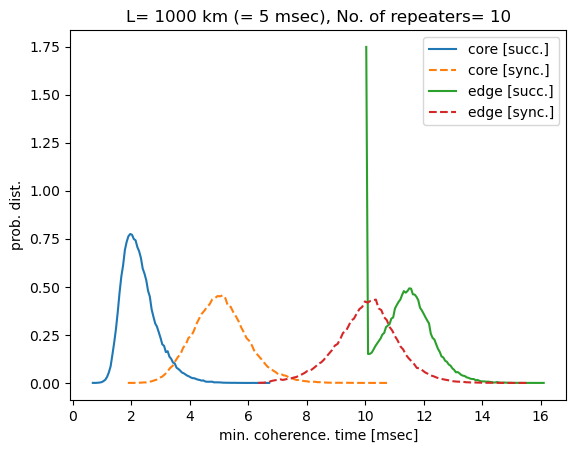

In [74]:
num_bins = 100

def plot_hist(y, label=" ", style = "-"):
    n, bin_edges = np.histogram(y, bins=num_bins)
    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
    plt.plot(bins_center,n, linestyle=style ,markersize=2, label = label)

plt.figure()
speed_of_light = 2e2 # km/msec
plot_hist(node_time/speed_of_light, label="core [succ.]")
plot_hist(node_time_sync/speed_of_light, label="core [sync.]",style = "--")

plot_hist(total_time/speed_of_light, label="edge [succ.]")
plot_hist(total_time_sync/speed_of_light, label="edge [sync.]",style = "--")

# plt.plot(node_time, label="succ. core")
# plt.plot(total_time, label="succ. edge")
# plt.plot(node_time_sync, label="succ. core")
# plt.plot(total_time_sync, label="sync. edge")
plt.legend()
plt.ylabel("prob. dist.")
plt.xlabel("min. coherence. time [msec]")
plt.title("L= %d km (= %d msec), No. of repeaters= %d" % (distance,distance/speed_of_light,Nrepeater))
plt.show()